In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import datetime
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Set plot style
sns.set(color_codes=True)

In [3]:
cwd = os.getcwd()
DF=os.path.join(cwd, "kansas_city_house_sales.csv")
df=pd.read_csv(DF)

In [4]:
df.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3

In [5]:
df.shape

(21613, 19)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

Change Date format 

In [9]:
df['date']= pd.to_datetime(df["date"], format='%Y-%m-%d')

In [10]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Check for missing values

In [11]:
pd.DataFrame({"Misssing values(%)": df.isnull().sum()/len(df.index)*100})
#no missing values

,Misssing values(%)
id,0.0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0


Dependant variable exploration
Check for data distribution 

In [12]:
columns=['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']

In [13]:
def plot_distribution( df, column, ax, bins_=50):
   
    # Plot the histogram
    df[[column]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

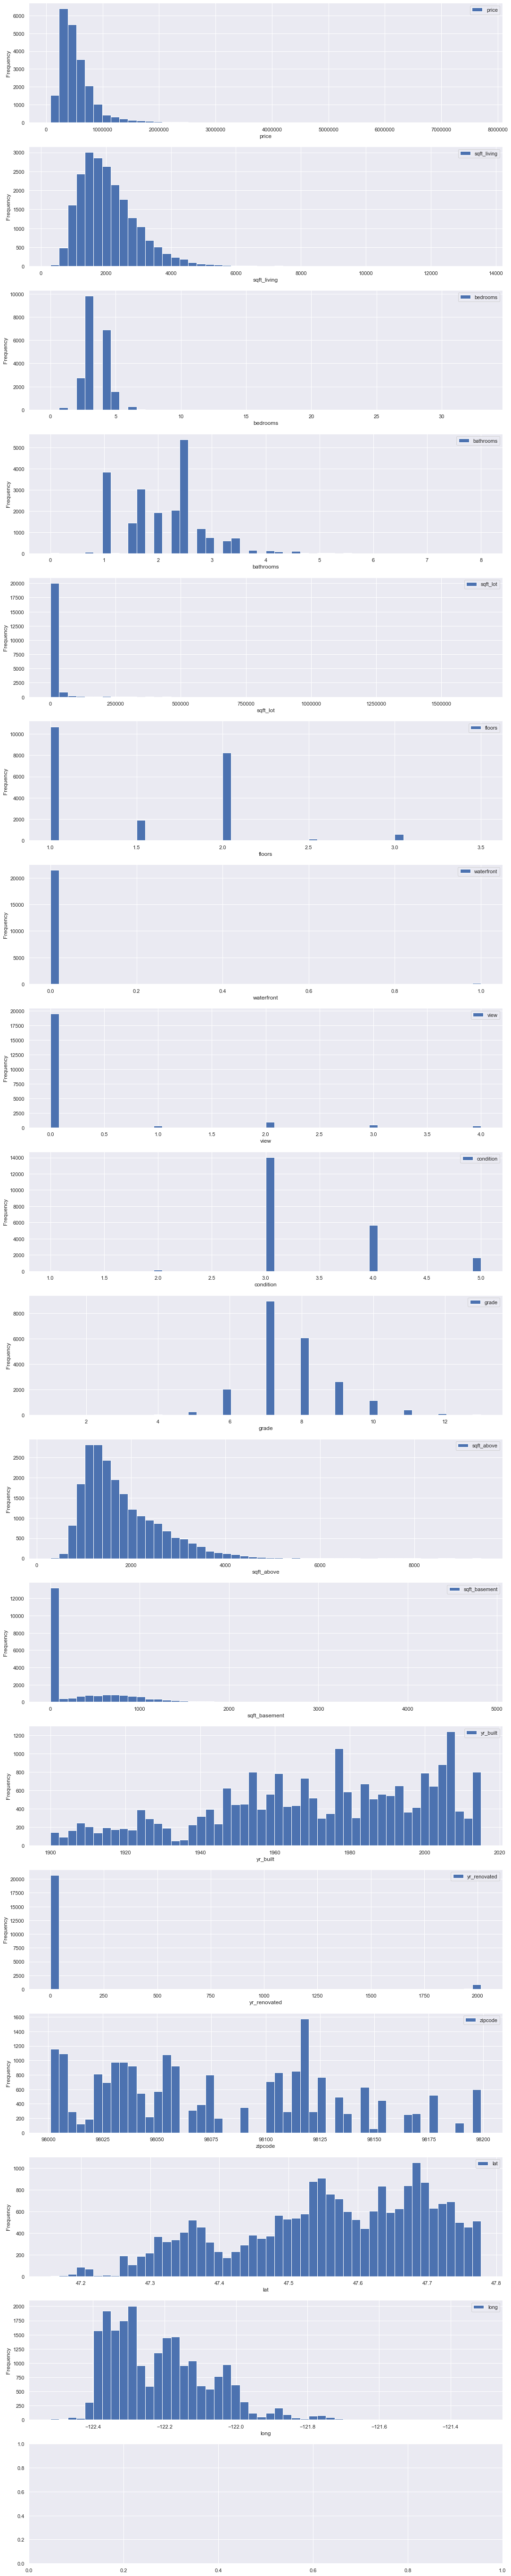

In [14]:
fig, axs = plt.subplots(nrows=18, figsize=(18,100))
i=0
# Plot histogram
for column in columns:
    plot_distribution(df, column, axs[i])
    i+=1
   

A normal distribution is required for the dependent variable => implement a log transformation 

In [15]:
df['Price(log10)'] = np.log10(df['price'])

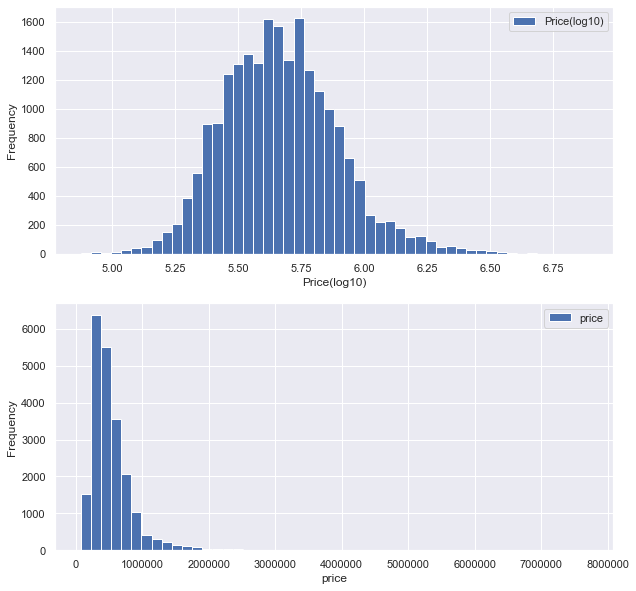

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
#Hist of Price log10
plot_distribution(df, 'Price(log10)', axs[0])
plot_distribution(df, 'price', axs[1])

Check for outliers

In [17]:
columns=['Price(log10)', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']

In [18]:
def boxPlots(df, column, ax):
    sns.boxplot(df[column], ax=ax)

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asist\anaconda3\lib\si

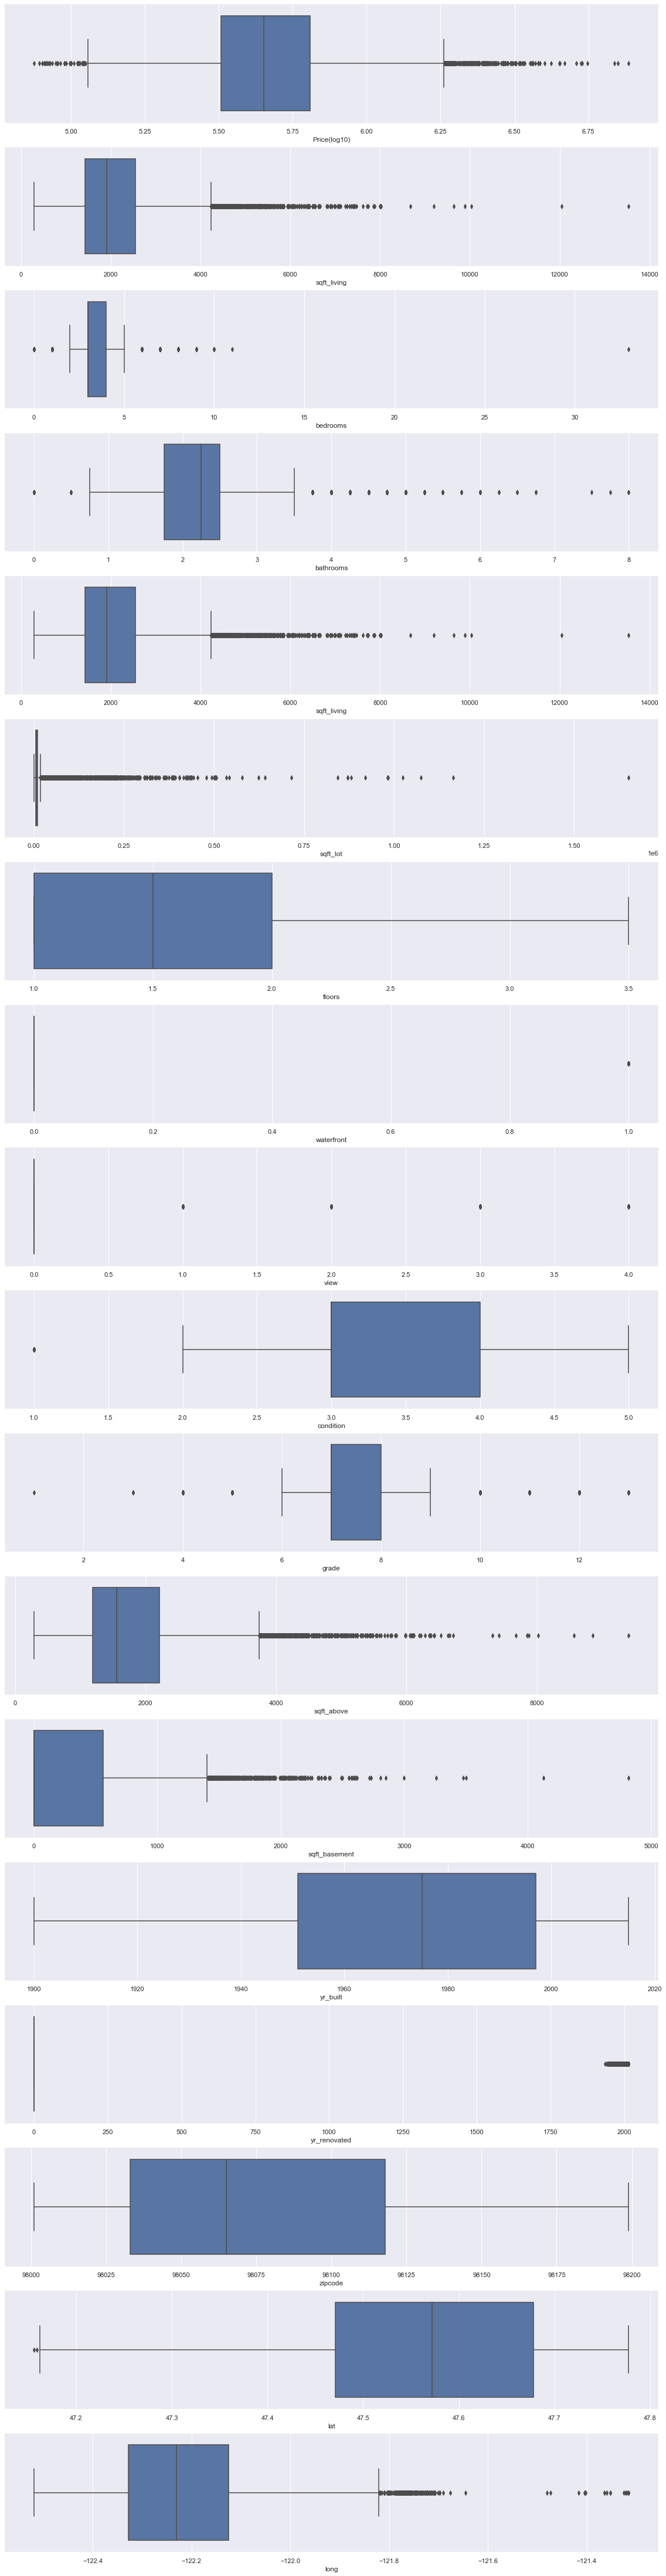

In [19]:
fig, axs = plt.subplots(nrows=18, figsize=(20,80))
i=0
# Plot boxplot
for column in columns:
    boxPlots(df, column, axs[i])
    i+=1

Remove from outliers from price 

In [20]:
def replace_outliers_z_score(dataframe, column, Z=3):
    from scipy import stats
    

    dataframe["zscore"] = stats.zscore(dataframe[column])

    # Determine the number of outliers ( z < -3 | z > 3 )
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]

    #Remove outliers
    dataframe = dataframe.drop(dataframe[(dataframe.zscore < -Z) | (dataframe.zscore > Z)].index)

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [21]:
replace_outliers_z_score(df, 'Price(log10)')

Replaced: 170  outliers in  Price(log10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Price(log10)
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,5.346157
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,5.730782
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,5.255273
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,5.781037
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,5.707570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,5.556303
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,5.602060
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,5.604335
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,5.602060


C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price(log10)'>

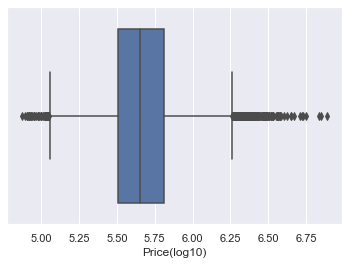

In [22]:
sns.boxplot(df["Price(log10)"])

Univariate analysis: continuos variables 

By sold date

In [23]:
def plotYear(df, column, new):   
    fig, ax = plt.subplots(nrows=1, figsize=(10,15))
    df[new] = df[column].apply(lambda x: str(x.year))
    temp = df[[new,  "id"]].groupby([new])["id"].count()
    temp.plot(kind="bar",
                figsize=(18,10),
                stacked=True,
                rot=0,
                title= "Solds per Year")
    plt.ylabel("No. of Houses")
    plt.xlabel("Year")
    plt.xticks(rotation='vertical')
  

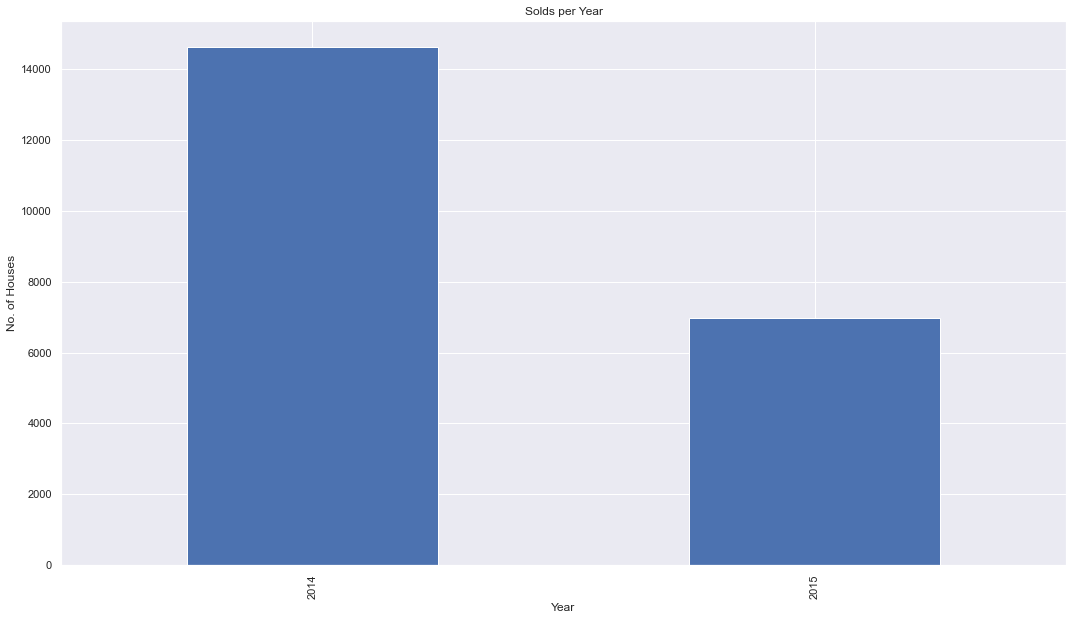

In [24]:
plotYear(df, 'date', 'Sales_year')

In [25]:
def plotMonth(df, column, new):   
    fig, ax = plt.subplots(nrows=1, figsize=(10,15))
    df[new] = df[column].apply(lambda x: str(x.year) + ' ' + str(x.month))
    temp = df[[new,  "id"]].groupby([new])["id"].count()
    temp.plot(kind="bar",
                figsize=(18,10),
                stacked=True,
                rot=0,
                title= "Monthly Sales")
    plt.ylabel("No. of Houses")
    plt.xlabel("Months")
    plt.xticks(rotation='vertical')
  

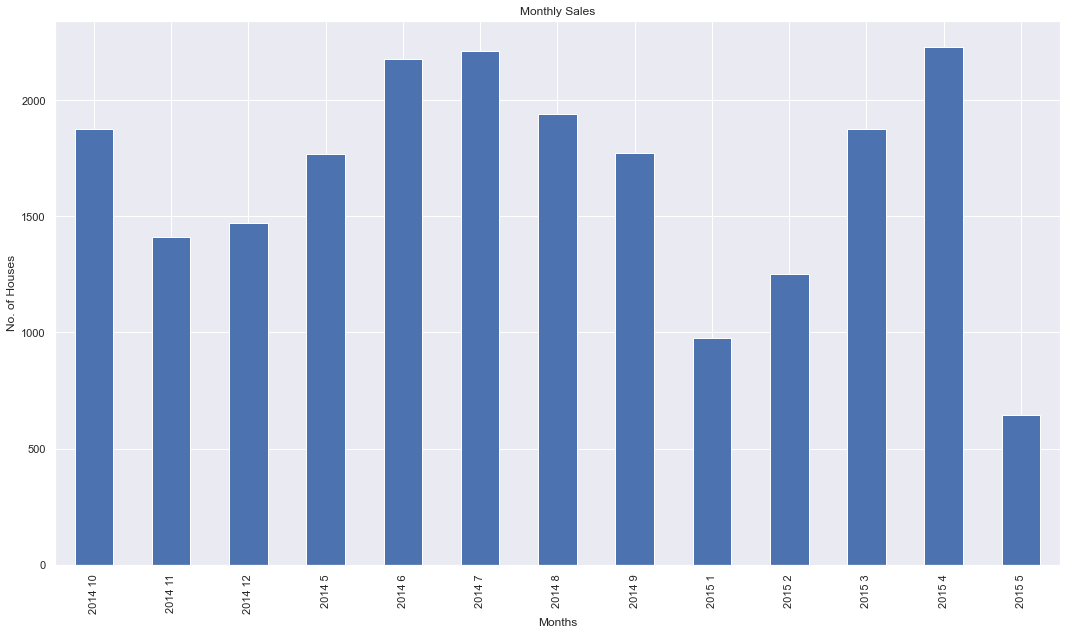

In [26]:
plotMonth(df, 'date', 'Sales_year-month')

There is a difference in the number of houses sold from one year to the other. However, only 5 months are taken into account in 2015 compared to 8 months in 2014. There is no need to transform the date variable

Univariate sqft living area

In [27]:
df['sqft_living'].value_counts()
#df['sqft_living'].value_counts()[:30].plot(kind='barh')

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1038, dtype: int64

In [28]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


Transform sqft_living to log10 because it is skewed to the left (Histogram in Line21)-> normal distribution 

In [29]:
df['sqft_living(log10)'] = np.log10(df['sqft_living'])

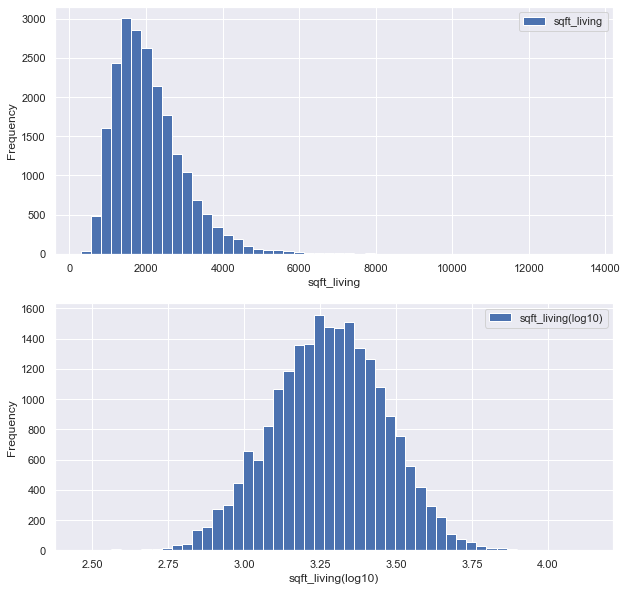

In [30]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
#Hist of sqft_living log10
plot_distribution(df, 'sqft_living(log10)', axs[1])
plot_distribution(df, 'sqft_living', axs[0])

In [31]:
replace_outliers_z_score(df, 'sqft_living(log10)')

Replaced: 62  outliers in  sqft_living(log10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Price(log10),Sales_year,Sales_year-month,sqft_living(log10)
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,5.346157,2014,2014 10,3.071882
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,5.730782,2014,2014 12,3.409933
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,5.255273,2015,2015 2,2.886491
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,5.781037,2014,2014 12,3.292256
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,5.707570,2015,2015 2,3.225309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,5.556303,2014,2014 5,3.184691
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,5.602060,2015,2015 2,3.363612
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,5.604335,2014,2014 6,3.008600
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,5.602060,2015,2015 1,3.204120


Univariate sqft lot
Transform sqft_lot to log10 because it is skewed to the left-> normal distribution 

In [32]:
df['sqft_lot(log10)'] = np.log10(df['sqft_lot'])

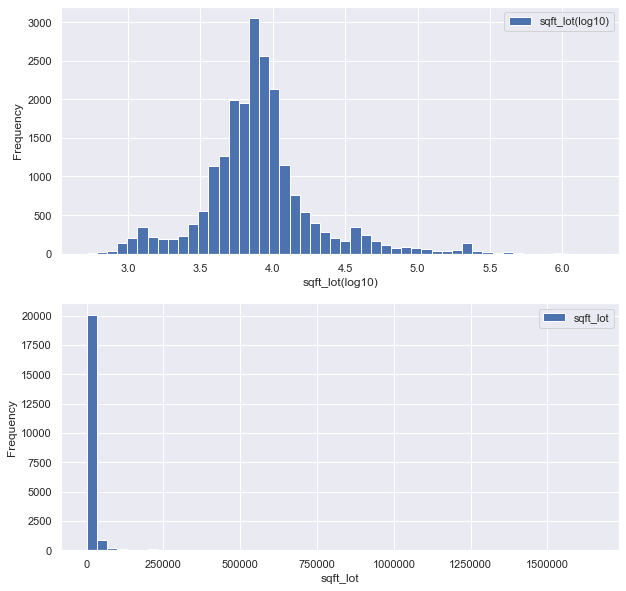

In [33]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
#Hist of sqft_lot log10
plot_distribution(df, 'sqft_lot(log10)', axs[0])
plot_distribution(df, 'sqft_lot', axs[1])

In [34]:
replace_outliers_z_score(df, 'sqft_lot(log10)')

Replaced: 382  outliers in  sqft_lot(log10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,Price(log10),Sales_year,Sales_year-month,sqft_living(log10),sqft_lot(log10)
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,5.346157,2014,2014 10,3.071882,3.752048
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,5.730782,2014,2014 12,3.409933,3.859859
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,5.255273,2015,2015 2,2.886491,4.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,5.781037,2014,2014 12,3.292256,3.698970
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,5.707570,2015,2015 2,3.225309,3.907411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,5.556303,2014,2014 5,3.184691,3.053463
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,5.602060,2015,2015 2,3.363612,3.764400
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,5.604335,2014,2014 6,3.008600,3.130334
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,5.602060,2015,2015 1,3.204120,3.378034


Univariate Floors

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='count'>

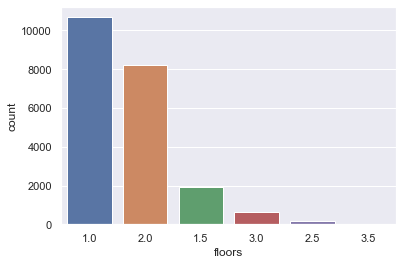

In [35]:
sns.countplot(df.floors,order=df['floors'].value_counts().index)

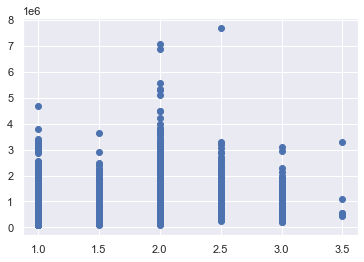

In [36]:
plt.scatter(df['floors'], df['price'])

no increment in the price after 2nd floor. Create a floor band

In [37]:
df.loc[df["floors"] > 2, "floors"] = 2

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Floor Counts
1.0,10680
2.0,9023
1.5,1910


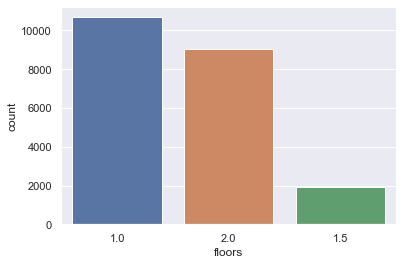

In [38]:
sns.countplot(df.floors,order=df['floors'].value_counts().index)
floors_counts = pd.DataFrame({"Floor Counts":df["floors"].value_counts()})
floors_counts

Univariate  Waterfront

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,WaterFront Counts
0,21450
1,163


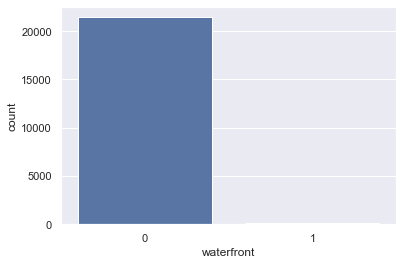

In [39]:
sns.countplot(df.waterfront,order=df['waterfront'].value_counts().index)
waterfront_counts = pd.DataFrame({"WaterFront Counts":df["waterfront"].value_counts()})
waterfront_counts

Due to the high number of house wothout waterfront, this variable may not have any effect on the price 

Univariate View (categorical)

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,View Counts
0,19489
2,963
3,510
1,332
4,319


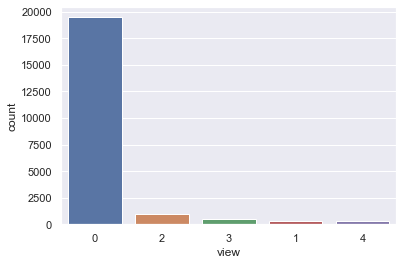

In [40]:
sns.countplot(df.view,order=df['view'].value_counts().index)
view_counts = pd.DataFrame({"View Counts":df["view"].value_counts()})
view_counts

Create a band with 1 and 0's. 

In [41]:
df.loc[df["view"] > 0, "view" ] = 1

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

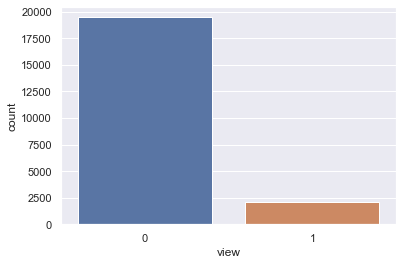

In [42]:
sns.countplot(df.view,order=df['view'].value_counts().index)

Univariate Condition

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Condition Counts
3,14031
4,5679
5,1701
2,172
1,30


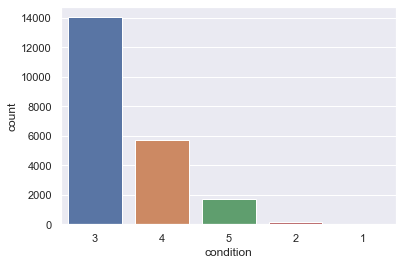

In [43]:
sns.countplot(df.condition,order=df['condition'].value_counts().index)
condition_counts = pd.DataFrame({"Condition Counts":df["condition"].value_counts()})
condition_counts

Univariate Grade

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Grade Counts
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


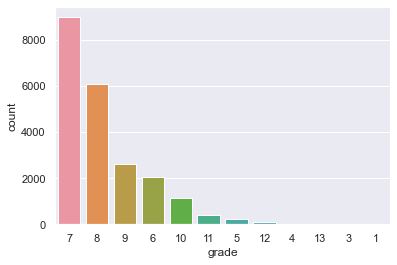

In [44]:
sns.countplot(df.grade,order=df['grade'].value_counts().index)
grade_counts = pd.DataFrame({"Grade Counts":df["grade"].value_counts()})
grade_counts

Unify all grades less than 6 as well as the ones greater than 10

In [45]:
df.loc[(df["grade"] > 10), "grade"] = 10
df.loc[(df["grade"] < 6), "grade"] = 6

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

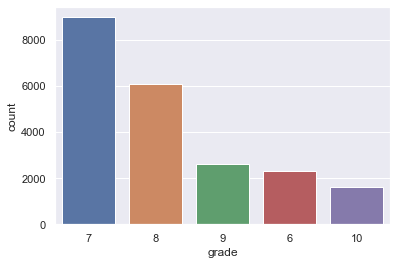

In [46]:
sns.countplot(df.grade,order=df['grade'].value_counts().index)

Univariate Sqft Above

According to the histogram (line21), the curve is skewed to the left 

In [47]:
df['sqft_above(log10)'] = np.log10(df['sqft_above'])

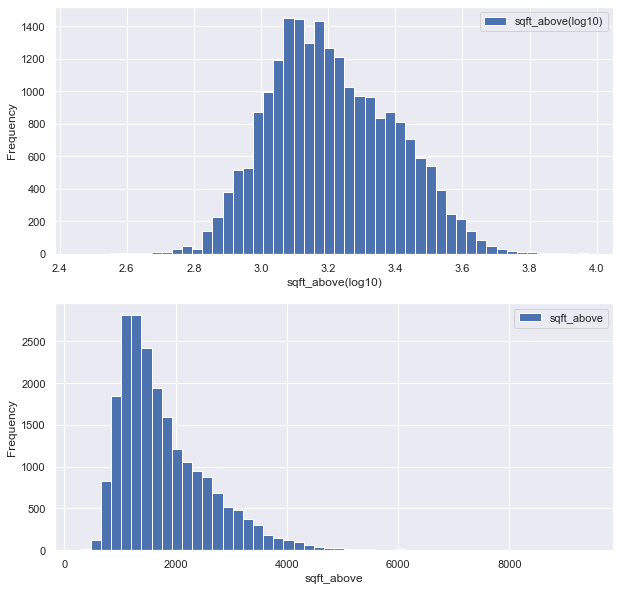

In [48]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))

plot_distribution(df, 'sqft_above(log10)', axs[0])
plot_distribution(df, 'sqft_above', axs[1])

In [49]:
replace_outliers_z_score(df, 'sqft_above(log10)')

Replaced: 43  outliers in  sqft_above(log10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,Price(log10),Sales_year,Sales_year-month,sqft_living(log10),sqft_lot(log10),sqft_above(log10)
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,5.346157,2014,2014 10,3.071882,3.752048,3.071882
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,5.730782,2014,2014 12,3.409933,3.859859,3.336460
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,5.255273,2015,2015 2,2.886491,4.000000,2.886491
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,5.781037,2014,2014 12,3.292256,3.698970,3.021189
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,5.707570,2015,2015 2,3.225309,3.907411,3.225309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,2.0,0,0,...,0,98103,47.6993,-122.346,5.556303,2014,2014 5,3.184691,3.053463,3.184691
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,5.602060,2015,2015 2,3.363612,3.764400,3.363612
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,5.604335,2014,2014 6,3.008600,3.130334,3.008600
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,5.602060,2015,2015 1,3.204120,3.378034,3.204120


Univariate sqft basement
Same case as above, histogram (line21), the curve is skewed to the left. But log10 of 0 is infinite and it is not possible to make the transformation

In [50]:
replace_outliers_z_score(df, 'sqft_basement')

Replaced: 247  outliers in  sqft_basement


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,Price(log10),Sales_year,Sales_year-month,sqft_living(log10),sqft_lot(log10),sqft_above(log10)
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,5.346157,2014,2014 10,3.071882,3.752048,3.071882
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,5.730782,2014,2014 12,3.409933,3.859859,3.336460
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,5.255273,2015,2015 2,2.886491,4.000000,2.886491
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,5.781037,2014,2014 12,3.292256,3.698970,3.021189
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,5.707570,2015,2015 2,3.225309,3.907411,3.225309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,2.0,0,0,...,0,98103,47.6993,-122.346,5.556303,2014,2014 5,3.184691,3.053463,3.184691
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,5.602060,2015,2015 2,3.363612,3.764400,3.363612
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,5.604335,2014,2014 6,3.008600,3.130334,3.008600
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,5.602060,2015,2015 1,3.204120,3.378034,3.204120


Univariate bedrooms

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Grade Bedrooms
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13
9,6


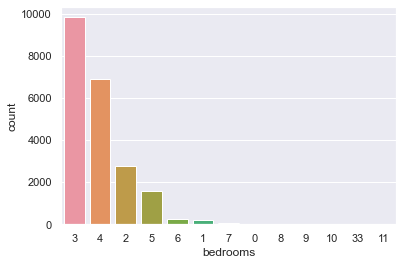

In [51]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)
bedroom_counts = pd.DataFrame({"Grade Bedrooms":df["bedrooms"].value_counts()})
bedroom_counts

A house with 33 bedrooms might possible be a typo error. In this case, the row will be dropped 

In [52]:
df = df.drop(df[df.bedrooms ==33].index)

C:\Users\asist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

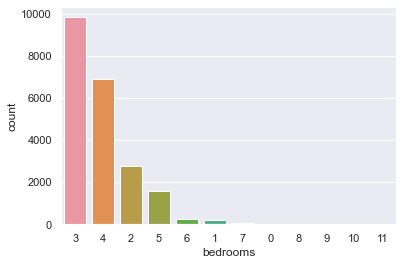

In [53]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

Derived Variables

In [54]:
df['per_living'] = df['sqft_living']*100/df['sqft_lot']

In [55]:
df['per_above'] = df['sqft_above']*100/df['sqft_lot']

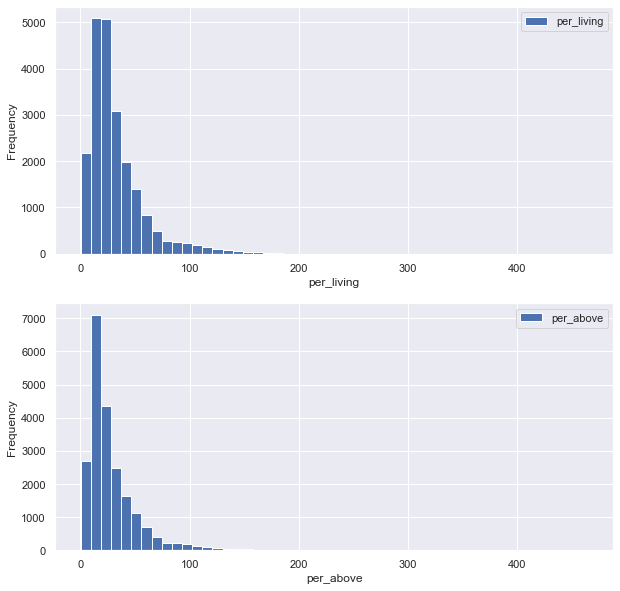

In [67]:
fig, axs = plt.subplots(nrows=2, figsize=(10,10))
#Hist of sqft_lot log10
plot_distribution(df, 'per_living', axs[0])
plot_distribution(df, 'per_above', axs[1])

In [56]:
df['age'] = df['Sales_year'].astype('int64')-df['yr_built']

In [57]:
df['renovated_flag'] = df['yr_renovated']
df.loc[(df["renovated_flag"] > 0), "renovated_flag"]=1

In [58]:
flagRenovated_counts = pd.DataFrame({"renovated_Flag Counts":df["renovated_flag"].value_counts()})
flagRenovated_counts

,renovated_Flag Counts
0,20698
1,914


In [59]:
df.loc[(df["yr_renovated"] > 0), "yr_renovated"] = df['Sales_year'].astype('int64')-df['yr_renovated']
df.loc[(df["yr_renovated"] == 0), "yr_renovated"] = df['age']
df = df.rename({"yr_renovated": "age_renovated"}, axis='columns')

In [60]:
ageRenovated_counts = pd.DataFrame({"age_Renovated Counts":df["age_renovated"].value_counts()})
ageRenovated_counts

,age_Renovated Counts
9,498
8,480
11,466
10,459
0,430
...,...
113,27
115,21
-1,18
81,16


Removing variables not required 

In [61]:
df.drop(columns=["id", "date", "price",  "sqft_living", "sqft_lot", "sqft_above", "yr_built"],inplace=True)

In [62]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,age_renovated,zipcode,...,zscore,Sales_year,Sales_year-month,sqft_living(log10),sqft_lot(log10),sqft_above(log10),per_living,per_above,age,renovated_flag
0,3,1.00,1.0,0,0,3,7,0,59,98178,...,-0.658681,2014,2014 10,3.071882,3.752048,3.071882,20.884956,20.884956,59,0
1,3,2.25,2.0,0,0,3,7,400,23,98125,...,0.245141,2014,2014 12,3.409933,3.859859,3.336460,35.487434,29.964098,63,1
2,2,1.00,1.0,0,0,3,6,0,82,98028,...,-0.658681,2015,2015 2,2.886491,4.000000,2.886491,7.700000,7.700000,82,0
3,4,3.00,1.0,0,0,5,7,910,49,98136,...,1.397515,2014,2014 12,3.292256,3.698970,3.021189,39.200000,21.000000,49,0
4,3,2.00,1.0,0,0,3,8,0,28,98074,...,-0.658681,2015,2015 2,3.225309,3.907411,3.225309,20.792079,20.792079,28,0


In [63]:
# save new csv
df.to_csv('clean_salesKansas_df.csv')